In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn')

In [2]:
pd.set_option("display.max.columns", None)

In [3]:
data = '../data/clean_readmissions.csv'

In [4]:
df = pd.read_csv(data)

In [5]:
df.sample(5)

,Unnamed: 0,days_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,Dx1_Heart_Failure,Dx1_Other_Heart_Disease,Dx1_Respiratory_sxs,Dx2_pH/Fluid_Imbalance,Dx2_Heart_Failure,Dx2_Diabetes_Mellitus,Dx2_Cardiac Dysrhythmias,Dx3_Diabetes_Mellitus,Dx3_Essential_Hypertension,Dx3_pH/Fluid_Imbalance,Dx3_Heart_Failure,diabetesMed_Yes,readmitted,race,gender,age,paycode,specialty,max_glu_serum,A1Cresult,change,med_metformin,med_repaglinide,med_nateglinide,med_chlorpropamide,med_glimepiride,med_acetohexamide,med_glipizide,med_glyburide,med_tolbutamide,med_pioglitazone,med_rosiglitazone,med_acarbose,med_miglitol,med_troglitazone,med_tolazamide,med_examide,med_citoglipton,med_insulin,med_glyburide-metformin,med_glipizide-metformin,med_glimepiride-pioglitazone,med_metformin-rosiglitazone,med_metformin-pioglitazone
9778,9778,6,47,3,64,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1,1,0,African_American,Male,age60-70,payer_code_?,Unknown_specialty,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1675,1675,3,44,0,12,0,0,1,9,1,0,0,0,0,0,0,0,0,0,0,1,1,Caucasian,Male,age80-90,payer_code_MC,Emergency/Trauma_Medicine,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9755,9755,14,38,1,16,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,1,1,African_American,Female,age70-80,payer_code_MC,Internal_Medicine,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
8969,8969,3,59,0,13,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,1,1,Other,Female,age80-90,payer_code_MC,Unknown_specialty,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4112,4112,3,66,0,14,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,1,0,Caucasian,Male,other,payer_code_MC,Unknown_specialty,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [6]:
del df['Unnamed: 0']

# Visualizations

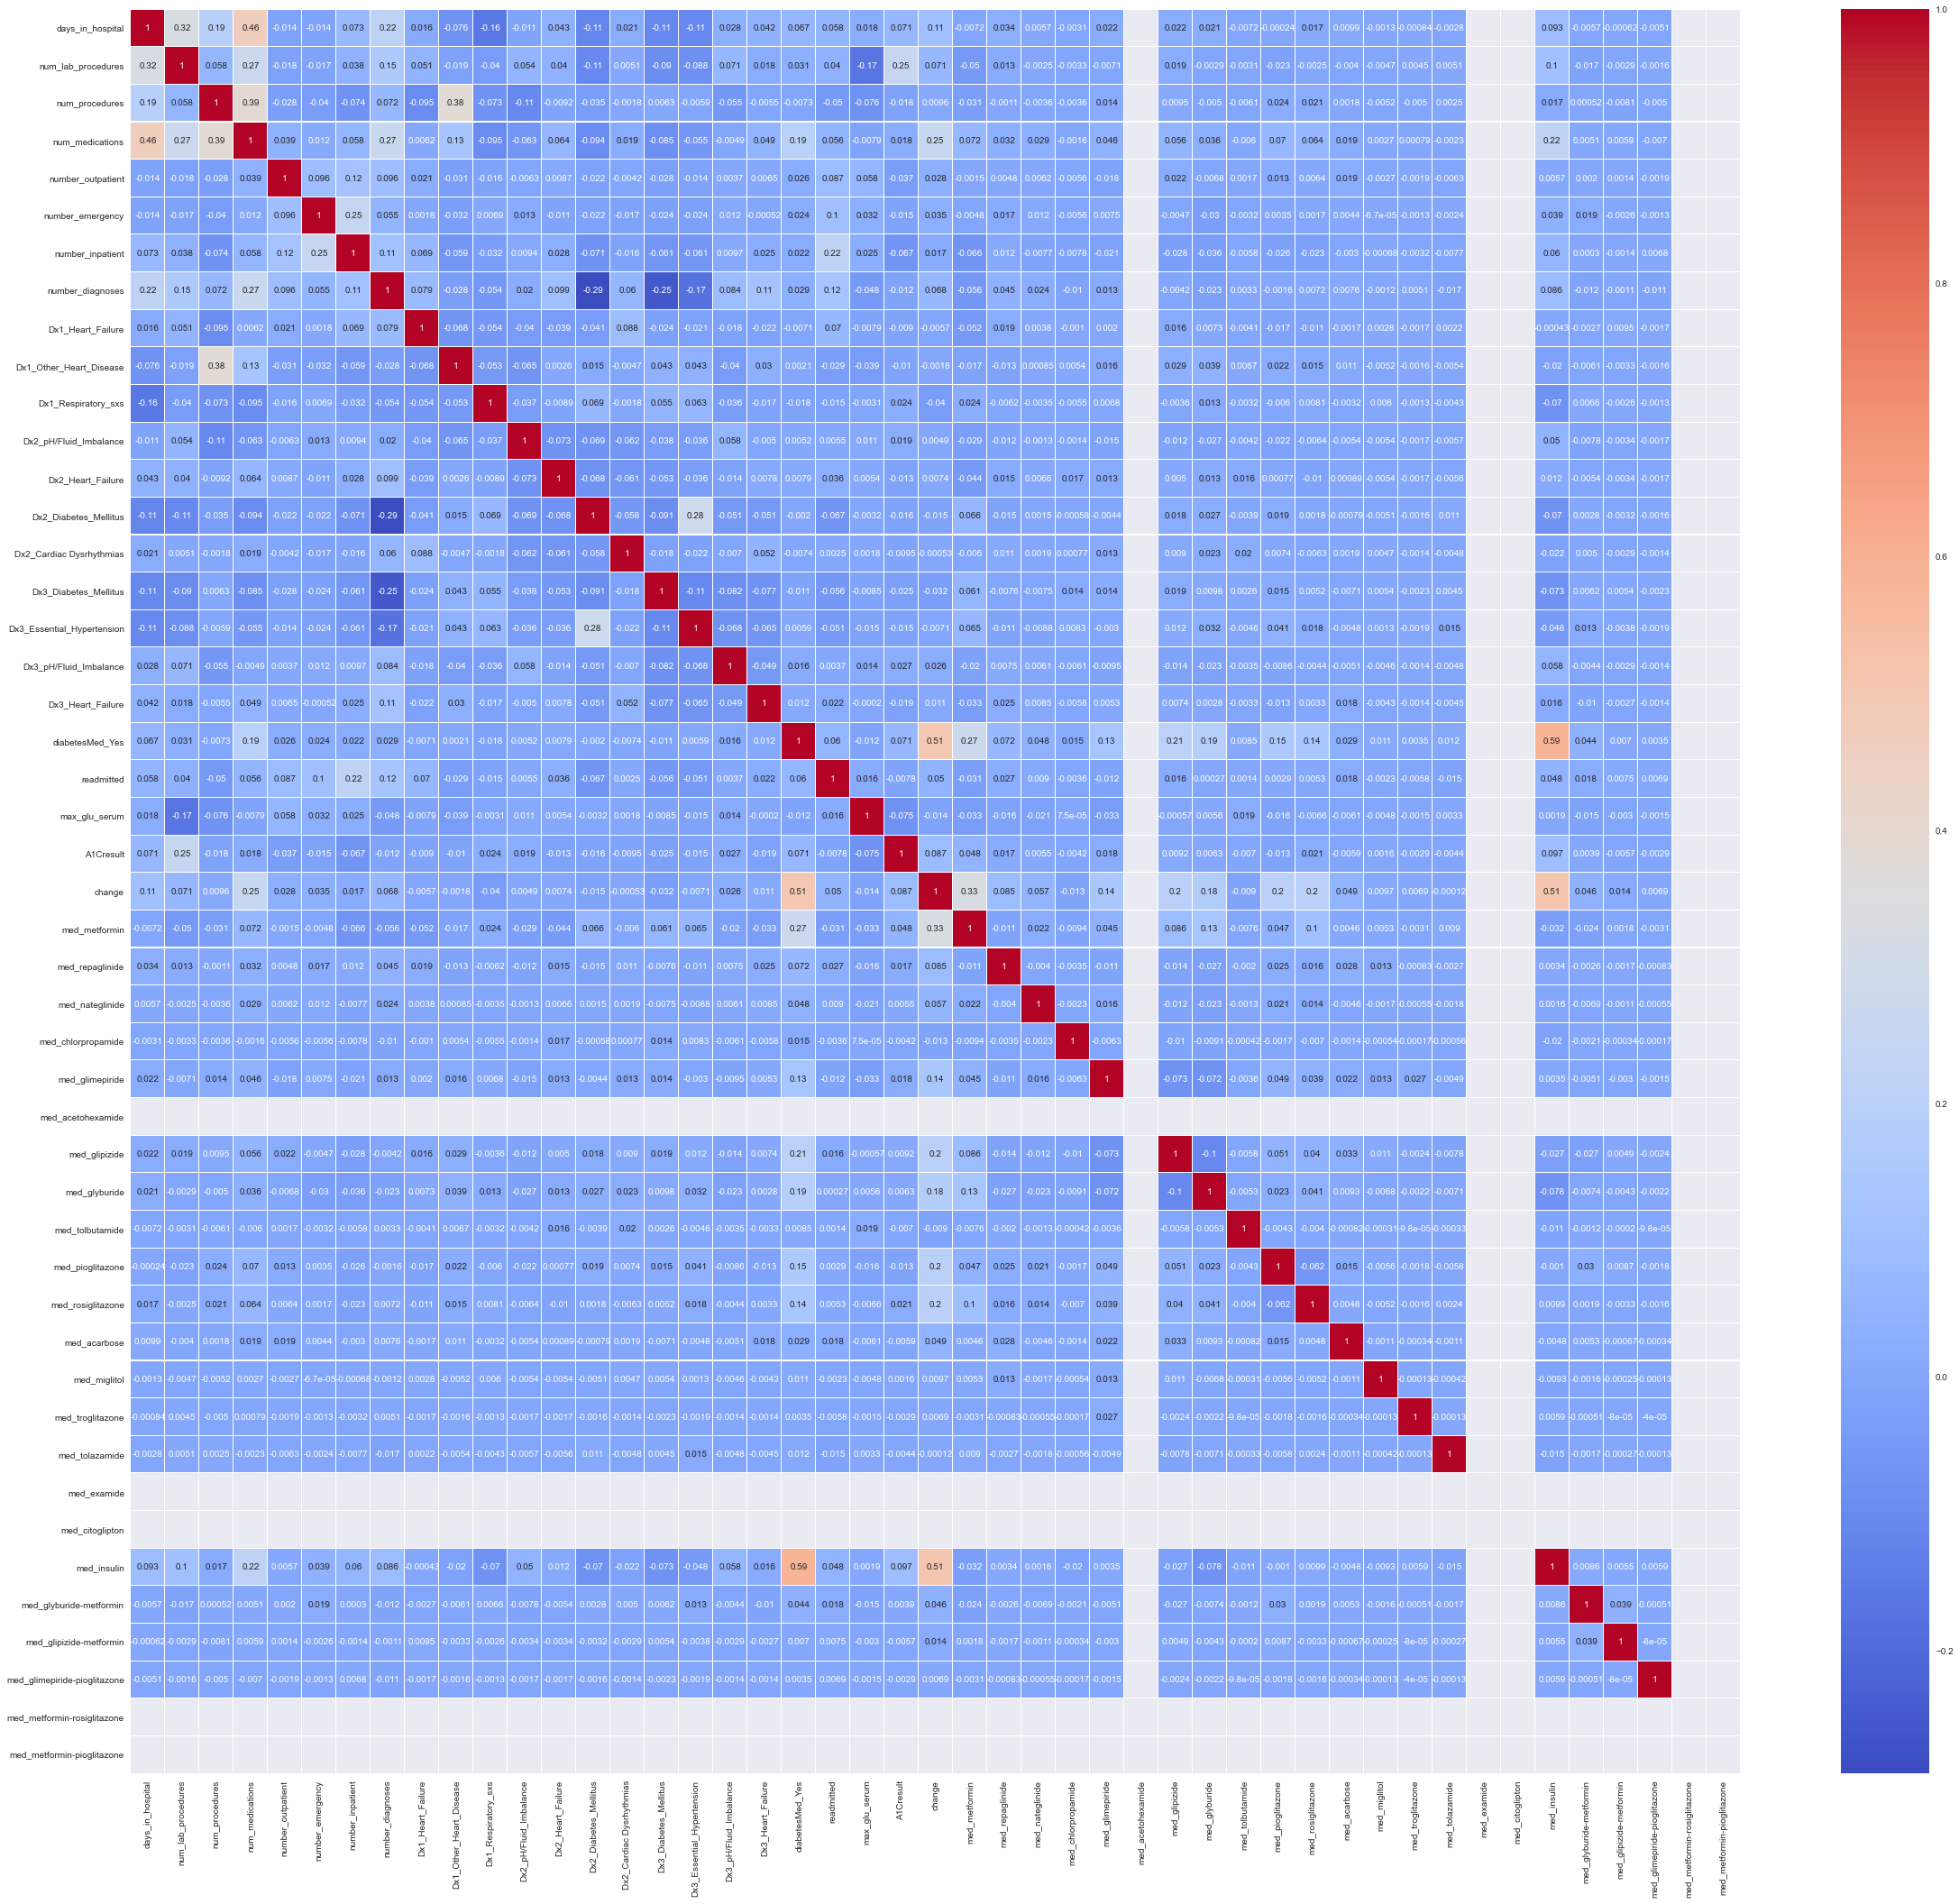

In [7]:
plt.figure(figsize=(40,36))
sns.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True)
plt.yticks(rotation=0);

### Numerical data

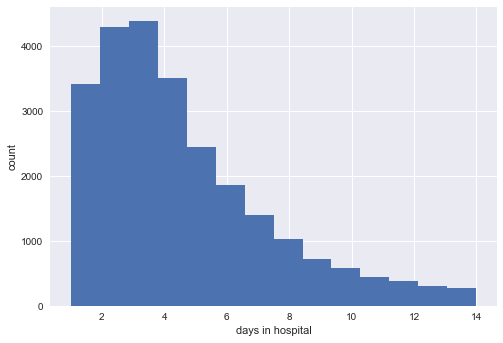

In [8]:
_ = plt.hist(df['days_in_hospital'], bins=14)

_ = plt.xlabel('days in hospital')
_ = plt.ylabel('count')

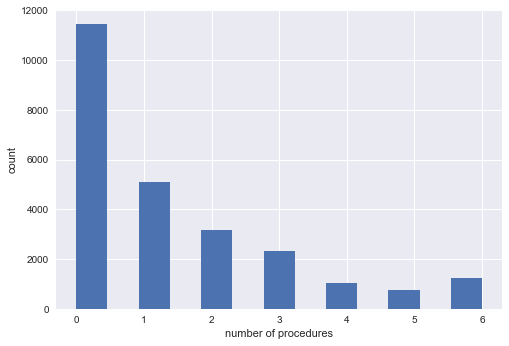

In [9]:
_ = plt.hist(df['num_procedures'], bins = 13)

_ = plt.xlabel('number of procedures')
_ = plt.ylabel('count')

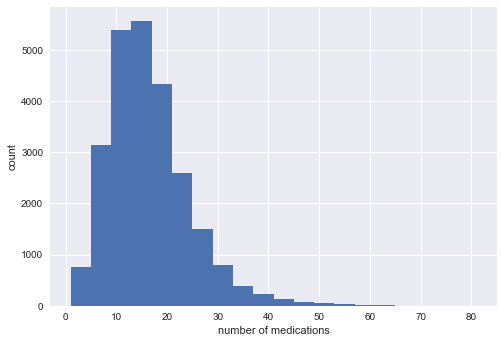

In [10]:
_ = plt.hist(df['num_medications'], bins = 20)

_ = plt.xlabel('number of medications')
_ = plt.ylabel('count')

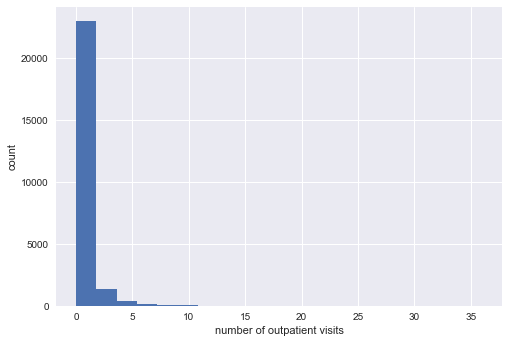

In [11]:
_ = plt.hist(df['number_outpatient'], bins = 20)

_ = plt.xlabel('number of outpatient visits')
_ = plt.ylabel('count')

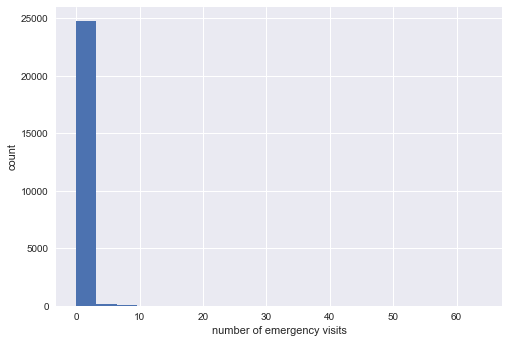

In [12]:
_ = plt.hist(df['number_emergency'], bins = 20)

_ = plt.xlabel('number of emergency visits')
_ = plt.ylabel('count')

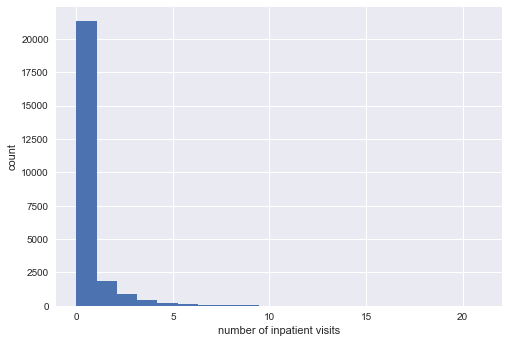

In [13]:
_ = plt.hist(df['number_inpatient'], bins = 20)

_ = plt.xlabel('number of inpatient visits')
_ = plt.ylabel('count')

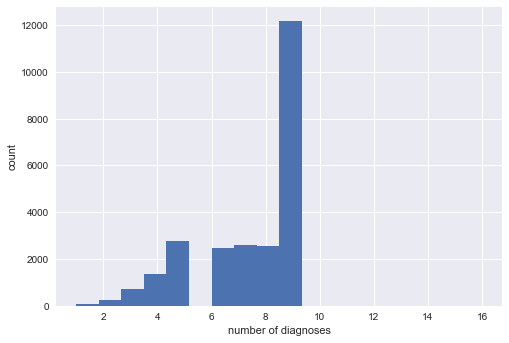

In [14]:
_ = plt.hist(df['number_diagnoses'], bins = 18)

_ = plt.xlabel('number of diagnoses')
_ = plt.ylabel('count')

### Categorical data

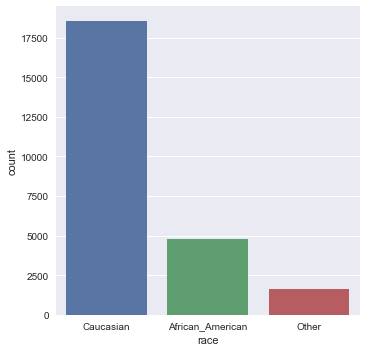

In [15]:
sns.catplot(x='race', data=df, kind='count')
plt.show()

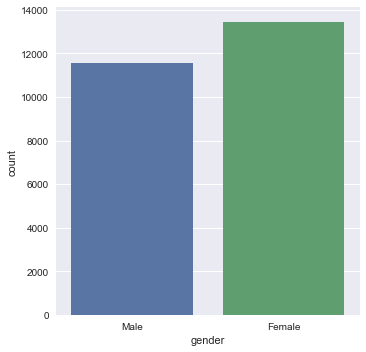

In [16]:
sns.catplot(x='gender', data=df, kind='count')
plt.show()

In [17]:
age_order = ['other','age40-50', 'age50-60', 'age60-70', 'age70-80', 'age80-90']

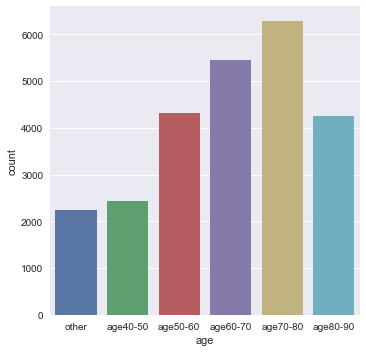

In [79]:
sns.catplot(x='age', data=df, kind='count', order=age_order )
plt.savefig('../figures/age.png',bbox_inches='tight')

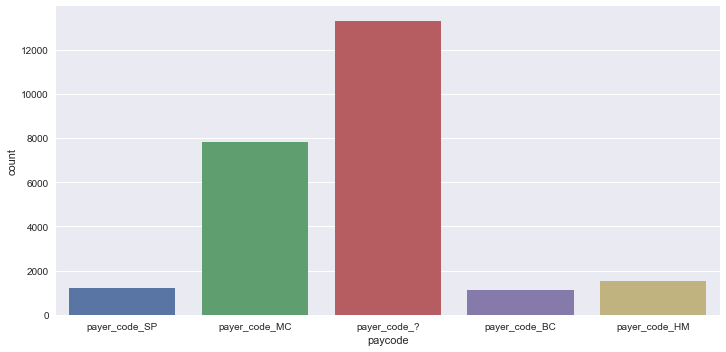

In [19]:
sns.catplot(x='paycode', data=df, kind='count', aspect=2)
plt.show()

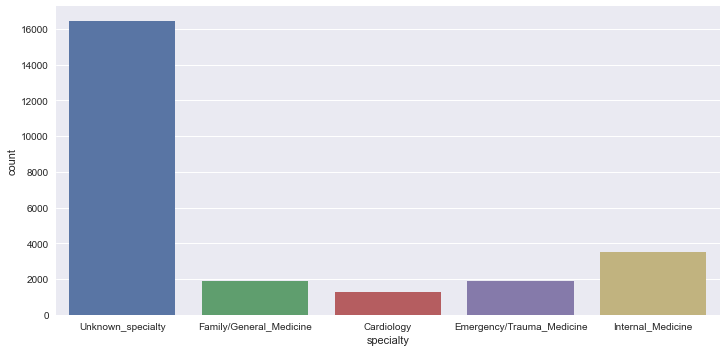

In [20]:
sns.catplot(x='specialty', data=df, kind='count', aspect=2)
plt.show()

### Boolean data

In [21]:
df.columns

Index(['days_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'Dx1_Heart_Failure',
       'Dx1_Other_Heart_Disease', 'Dx1_Respiratory_sxs',
       'Dx2_pH/Fluid_Imbalance', 'Dx2_Heart_Failure', 'Dx2_Diabetes_Mellitus',
       'Dx2_Cardiac Dysrhythmias', 'Dx3_Diabetes_Mellitus',
       'Dx3_Essential_Hypertension', 'Dx3_pH/Fluid_Imbalance',
       'Dx3_Heart_Failure', 'diabetesMed_Yes', 'readmitted', 'race', 'gender',
       'age', 'paycode', 'specialty', 'max_glu_serum', 'A1Cresult', 'change',
       'med_metformin', 'med_repaglinide', 'med_nateglinide',
       'med_chlorpropamide', 'med_glimepiride', 'med_acetohexamide',
       'med_glipizide', 'med_glyburide', 'med_tolbutamide', 'med_pioglitazone',
       'med_rosiglitazone', 'med_acarbose', 'med_miglitol', 'med_troglitazone',
       'med_tolazamide', 'med_examide', 'med_citoglipton', 'med_insulin',
       'med_glybu

In [22]:
bool_list = ['Dx1_Other_Heart_Disease', 'Dx1_Respiratory_sxs',
       'Dx2_pH/Fluid_Imbalance', 'Dx2_Heart_Failure', 'Dx2_Diabetes_Mellitus',
       'Dx2_Cardiac Dysrhythmias', 'Dx3_Diabetes_Mellitus',
       'Dx3_Essential_Hypertension', 'Dx3_pH/Fluid_Imbalance',
       'Dx3_Heart_Failure', 'diabetesMed_Yes', 'readmitted','max_glu_serum', 'A1Cresult', 'change',
       'med_metformin', 'med_repaglinide', 'med_nateglinide',
       'med_chlorpropamide', 'med_glimepiride', 'med_acetohexamide',
       'med_glipizide', 'med_glyburide', 'med_tolbutamide', 'med_pioglitazone',
       'med_rosiglitazone', 'med_acarbose', 'med_miglitol', 'med_troglitazone',
       'med_tolazamide', 'med_examide', 'med_citoglipton', 'med_insulin',
       'med_glyburide-metformin', 'med_glipizide-metformin',
       'med_glimepiride-pioglitazone', 'med_metformin-rosiglitazone',
       'med_metformin-pioglitazone']

In [23]:
booleans = df[bool_list]

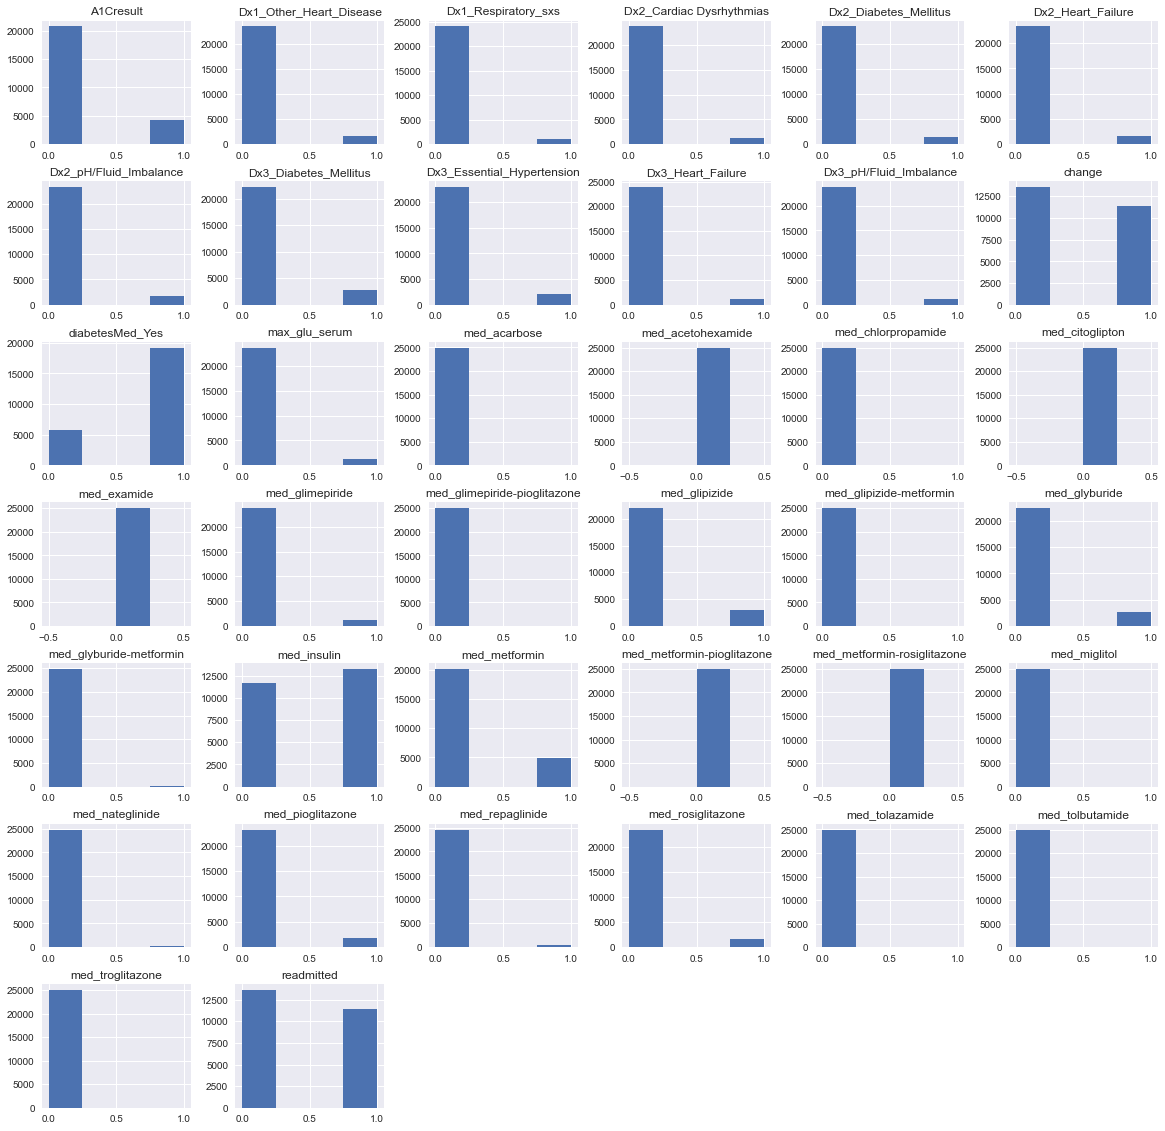

In [24]:
hist = booleans.hist(bins=4, figsize =(20,20))

In [25]:
[df[col].value_counts() for col in booleans]

[0    23438
 1     1562
 Name: Dx1_Other_Heart_Disease, dtype: int64,
 0    23989
 1     1011
 Name: Dx1_Respiratory_sxs, dtype: int64,
 0    23285
 1     1715
 Name: Dx2_pH/Fluid_Imbalance, dtype: int64,
 0    23319
 1     1681
 Name: Dx2_Heart_Failure, dtype: int64,
 0    23483
 1     1517
 Name: Dx2_Diabetes_Mellitus, dtype: int64,
 0    23766
 1     1234
 Name: Dx2_Cardiac Dysrhythmias, dtype: int64,
 0    22152
 1     2848
 Name: Dx3_Diabetes_Mellitus, dtype: int64,
 0    22949
 1     2051
 Name: Dx3_Essential_Hypertension, dtype: int64,
 0    23760
 1     1240
 Name: Dx3_pH/Fluid_Imbalance, dtype: int64,
 0    23885
 1     1115
 Name: Dx3_Heart_Failure, dtype: int64,
 1    19185
 0     5815
 Name: diabetesMed_Yes, dtype: int64,
 0    13590
 1    11410
 Name: readmitted, dtype: int64,
 0    23627
 1     1373
 Name: max_glu_serum, dtype: int64,
 0    20737
 1     4263
 Name: A1Cresult, dtype: int64,
 0    13565
 1    11435
 Name: change, dtype: int64,
 0    20141
 1     4859
 Name:

In [26]:
# drop any columns where there are too few data represented
drop_list = ['med_citoglipton', 'med_examide', 'med_acetohexamide', 'med_glimepiride-pioglitazone',
            'med_metformin-rosiglitazone', 'med_miglitol', 
            'med_metformin-pioglitazone', 'med_troglitazone']

In [27]:
df.drop(df[drop_list], axis = 1, inplace=True)

In [28]:
df.head()

,days_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,Dx1_Heart_Failure,Dx1_Other_Heart_Disease,Dx1_Respiratory_sxs,Dx2_pH/Fluid_Imbalance,Dx2_Heart_Failure,Dx2_Diabetes_Mellitus,Dx2_Cardiac Dysrhythmias,Dx3_Diabetes_Mellitus,Dx3_Essential_Hypertension,Dx3_pH/Fluid_Imbalance,Dx3_Heart_Failure,diabetesMed_Yes,readmitted,race,gender,age,paycode,specialty,max_glu_serum,A1Cresult,change,med_metformin,med_repaglinide,med_nateglinide,med_chlorpropamide,med_glimepiride,med_glipizide,med_glyburide,med_tolbutamide,med_pioglitazone,med_rosiglitazone,med_acarbose,med_tolazamide,med_insulin,med_glyburide-metformin,med_glipizide-metformin
0,14,41,0,11,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,1,0,Caucasian,Male,age50-60,payer_code_SP,Unknown_specialty,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,30,0,12,0,0,1,9,0,0,0,0,0,0,0,0,0,0,0,1,1,Caucasian,Female,age50-60,payer_code_SP,Unknown_specialty,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,5,66,0,22,1,0,2,9,0,0,0,0,0,0,0,0,0,0,0,1,1,Caucasian,Female,age80-90,payer_code_MC,Unknown_specialty,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,63,0,8,0,0,0,8,0,1,0,0,0,0,0,0,0,0,0,1,1,Caucasian,Female,age50-60,payer_code_?,Unknown_specialty,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,40,0,6,0,0,1,9,0,0,0,0,0,0,0,0,1,0,0,0,0,Caucasian,Female,age80-90,payer_code_?,Family/General_Medicine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Further Exploration

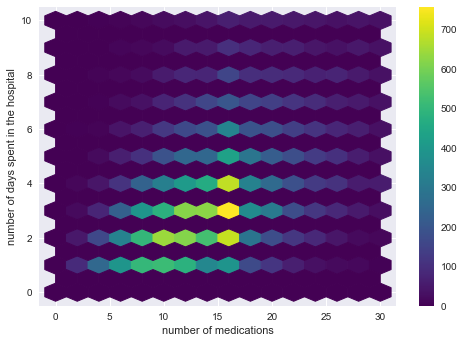

In [78]:
_ = plt.hexbin(df['num_medications'], df['days_in_hospital'], gridsize = (15,10), extent=(0, 30, 0, 10), cmap='viridis')

_ = plt.xlabel('number of medications')
_ = plt.ylabel('number of days spent in the hospital')

plt.colorbar()
plt.savefig('../figures/hex_meds_vs_stay.png',bbox_inches='tight')

In [30]:
df['readmitted'].value_counts(normalize=True)

0    0.5436
1    0.4564
Name: readmitted, dtype: float64

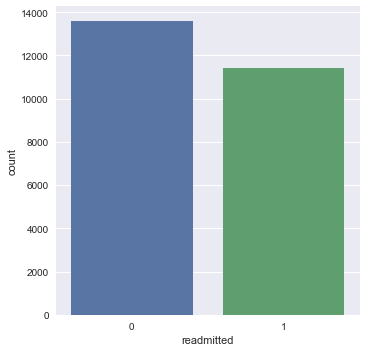

In [77]:
sns.catplot(x='readmitted', data=df, kind='count')
plt.savefig('../figures/readmitted.png',bbox_inches='tight')

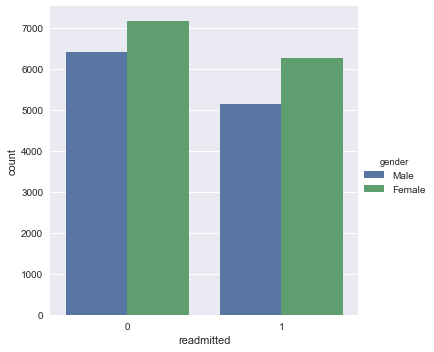

In [32]:
sns.catplot(x='readmitted', data=df, kind='count', hue='gender')
plt.show()

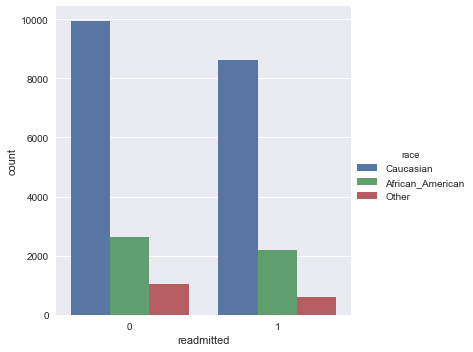

In [33]:
sns.catplot(x='readmitted', data=df, kind='count', hue='race')
plt.show()

In [34]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

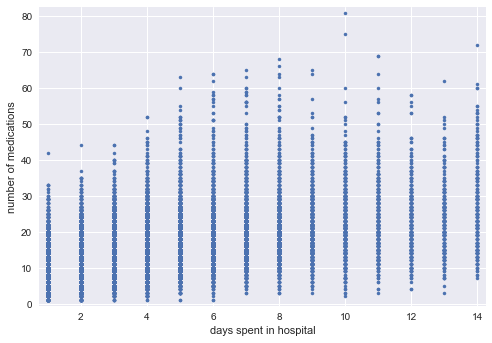

0.4618740122756179


In [35]:
# plot the data 
_ = plt.plot(df['days_in_hospital'], df['num_medications'], marker='.', linestyle='none')

# set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('days spent in hospital')
_ = plt.ylabel('number of medications')

# show the plot
plt.show()

# show the Pearson correlation coefficient
print(pearson_r(df['days_in_hospital'], df['num_medications']))

In [36]:
slope, intercept = np.polyfit(df['days_in_hospital'], df['num_medications'],1)
slope, intercept

(1.2519389655367685, 10.48536700552793)

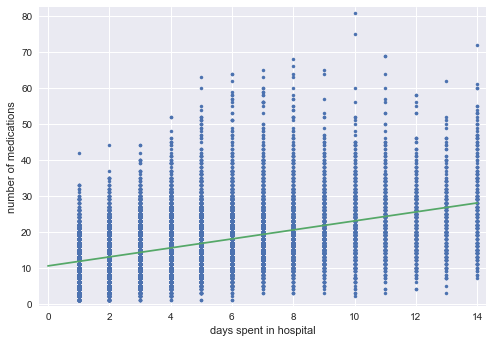

In [63]:
# plot the data 
plt.plot(df['days_in_hospital'], df['num_medications'], marker='.', linestyle='none')

# set the margins and label axes
plt.margins(0.02)
plt.xlabel('days spent in hospital')
plt.ylabel('number of medications')

# Make theoretical line to plot
x = np.array([0,14])
y = slope * x + intercept

# Add regression line to your plot
plt.plot(x, y)

# save the figure
plt.savefig('../figures/stay_vs_meds.png',bbox_inches='tight')

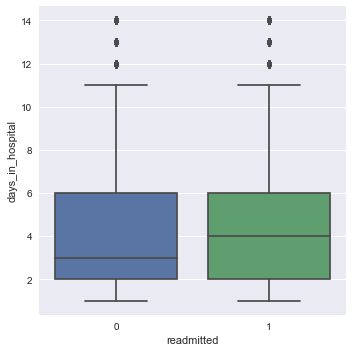

In [38]:
_ = sns.catplot(x='readmitted', y='days_in_hospital', data=df, kind='box', whis=[5, 95])
plt.show()

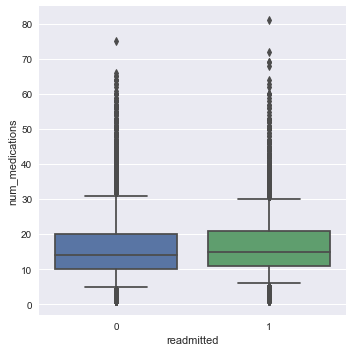

In [39]:
_ = sns.catplot(x='readmitted', y='num_medications', data=df, kind='box', whis=[5, 95])
plt.show()

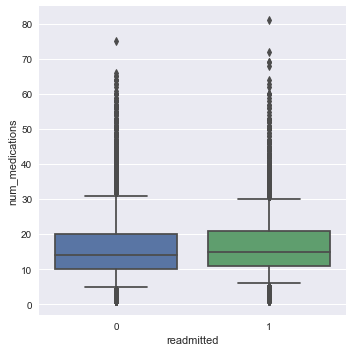

In [40]:
_ = sns.catplot(x='readmitted', y='num_medications', data=df, kind='box', whis=[5, 95])
plt.show()

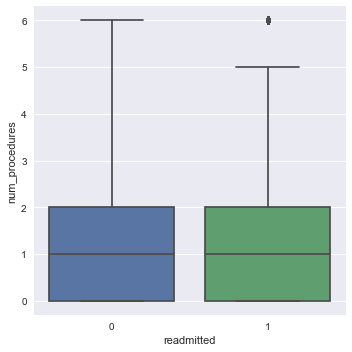

In [41]:
_ = sns.catplot(x='readmitted', y='num_procedures', data=df, kind='box', whis=[5, 95])
plt.show()

In [42]:
df_emergency = df[df['number_emergency'] != 0]

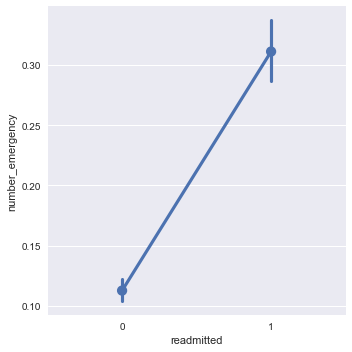

In [76]:
_ = sns.catplot(x='readmitted', y='number_emergency', data=df, kind='point', whis=[0, 100])
plt.savefig('../readmitted_emergency.png',bbox_inches='tight')

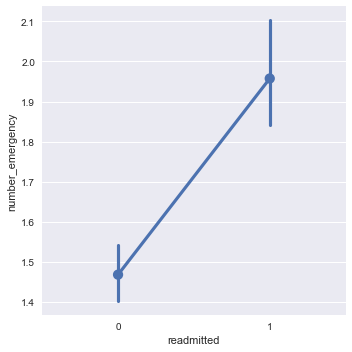

In [44]:
_ = sns.catplot(x='readmitted', y='number_emergency', data=df_emergency, kind='point', whis=[0, 100])
plt.show()

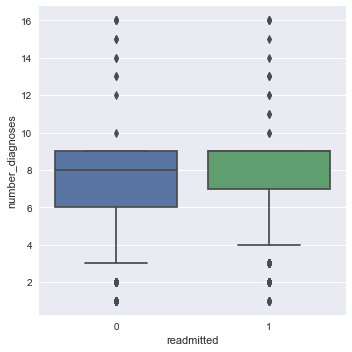

In [45]:
_ = sns.catplot(x='readmitted', y='number_diagnoses', data=df, kind='box', whis=[5, 95])
plt.show()

In [46]:
df.columns

Index(['days_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'Dx1_Heart_Failure',
       'Dx1_Other_Heart_Disease', 'Dx1_Respiratory_sxs',
       'Dx2_pH/Fluid_Imbalance', 'Dx2_Heart_Failure', 'Dx2_Diabetes_Mellitus',
       'Dx2_Cardiac Dysrhythmias', 'Dx3_Diabetes_Mellitus',
       'Dx3_Essential_Hypertension', 'Dx3_pH/Fluid_Imbalance',
       'Dx3_Heart_Failure', 'diabetesMed_Yes', 'readmitted', 'race', 'gender',
       'age', 'paycode', 'specialty', 'max_glu_serum', 'A1Cresult', 'change',
       'med_metformin', 'med_repaglinide', 'med_nateglinide',
       'med_chlorpropamide', 'med_glimepiride', 'med_glipizide',
       'med_glyburide', 'med_tolbutamide', 'med_pioglitazone',
       'med_rosiglitazone', 'med_acarbose', 'med_tolazamide', 'med_insulin',
       'med_glyburide-metformin', 'med_glipizide-metformin'],
      dtype='object')

In [47]:
medications_list = ['med_metformin', 'med_repaglinide', 'med_nateglinide',
       'med_chlorpropamide', 'med_glimepiride', 'med_glipizide',
       'med_glyburide', 'med_tolbutamide', 'med_pioglitazone',
       'med_rosiglitazone', 'med_acarbose', 'med_tolazamide', 'med_insulin',
       'med_glyburide-metformin', 'med_glipizide-metformin']

In [48]:
df[medications_list].head()

,med_metformin,med_repaglinide,med_nateglinide,med_chlorpropamide,med_glimepiride,med_glipizide,med_glyburide,med_tolbutamide,med_pioglitazone,med_rosiglitazone,med_acarbose,med_tolazamide,med_insulin,med_glyburide-metformin,med_glipizide-metformin
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Diabetes Patients

In [73]:
df_diabetes = df.loc[(df['Dx2_Diabetes_Mellitus'] == 1) | (df['Dx3_Diabetes_Mellitus'] == 1)]
df_diabetes.shape

(4365, 44)

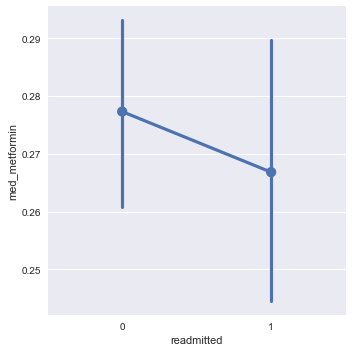

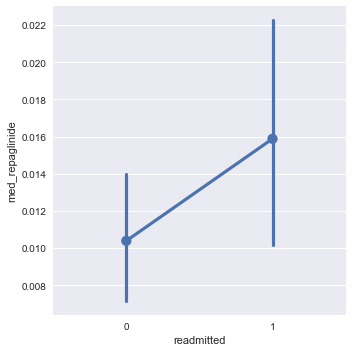

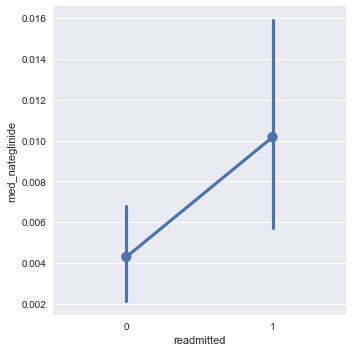

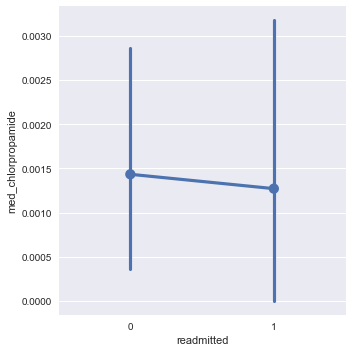

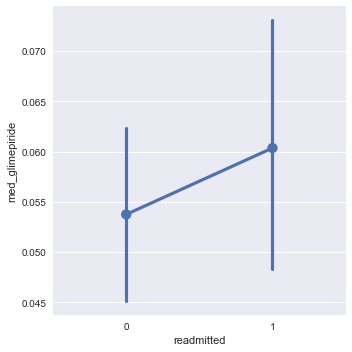

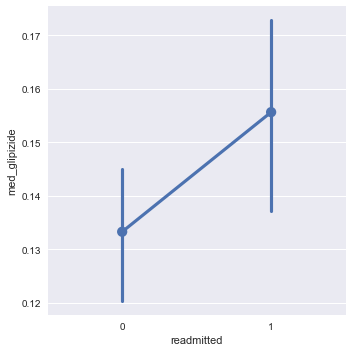

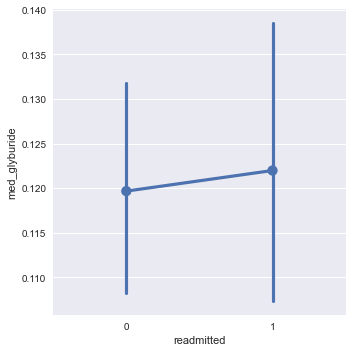

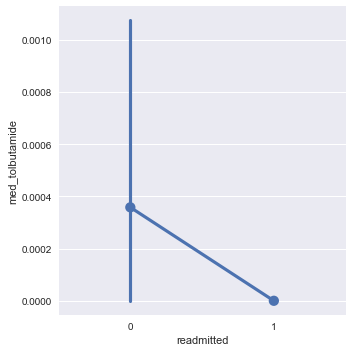

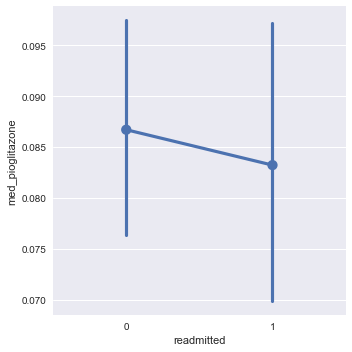

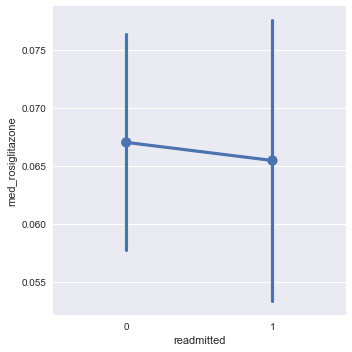

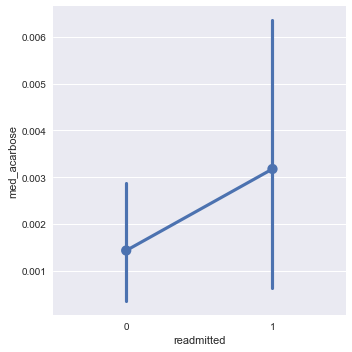

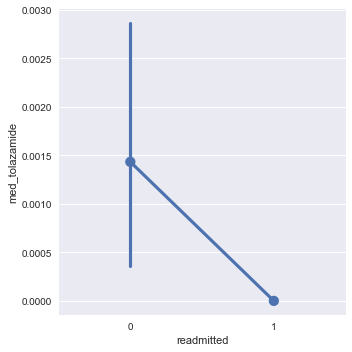

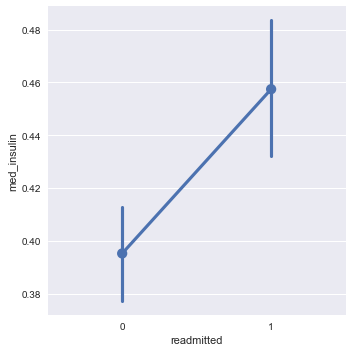

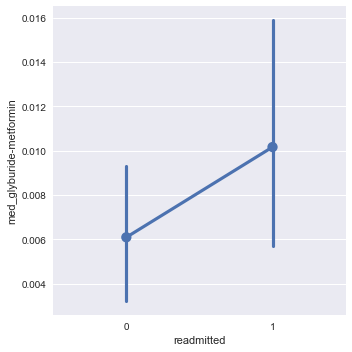

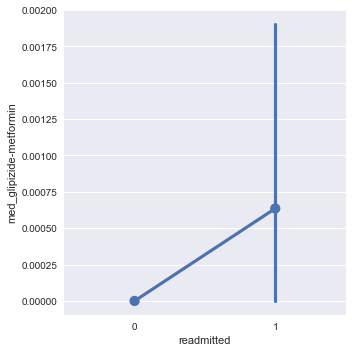

In [69]:
for col in df[medications_list]:
    _ = sns.catplot(x='readmitted', y=str(col), data=df_diabetes, kind='point', whis=[5, 95])
    plt.savefig('../figures/diabetes_figs/diabetes_'+str(col)+'.png',bbox_inches='tight')

# Heart Failure Patients

In [72]:
df_hf = df.loc[(df['Dx1_Heart_Failure'] == 1) | (df['Dx2_Heart_Failure'] == 1) | (df['Dx3_Heart_Failure'] == 1)]
df_hf.shape

(4243, 44)

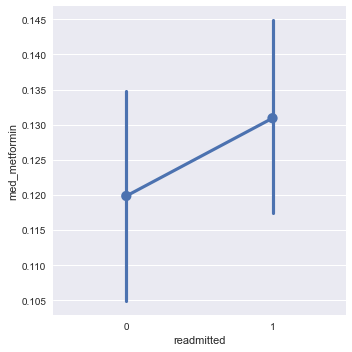

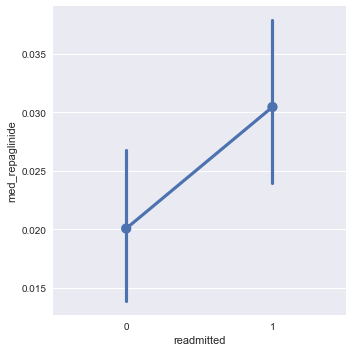

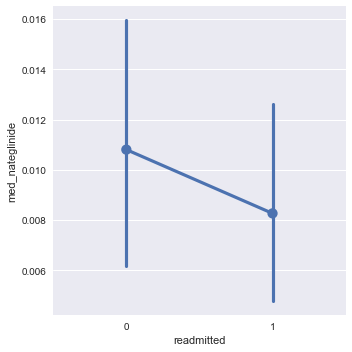

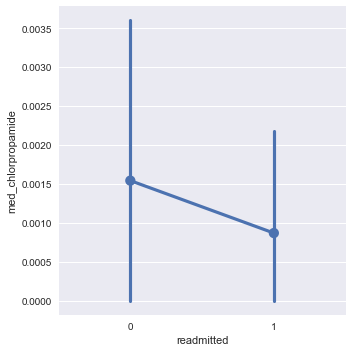

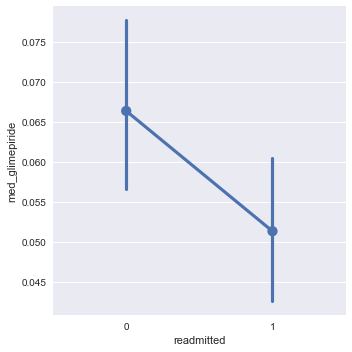

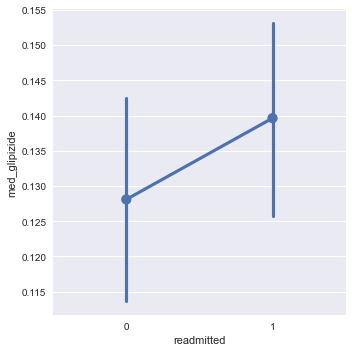

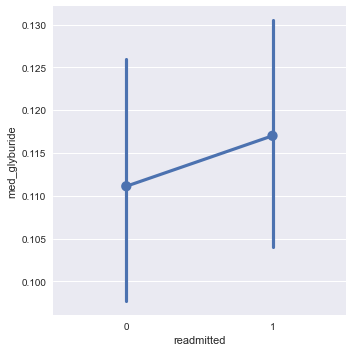

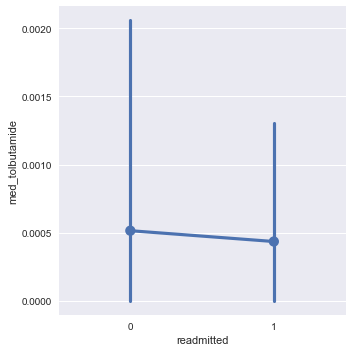

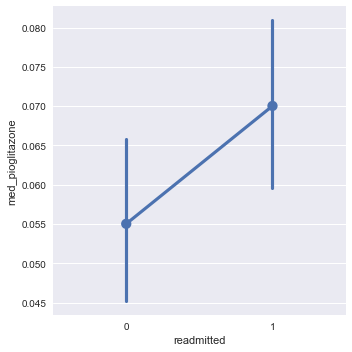

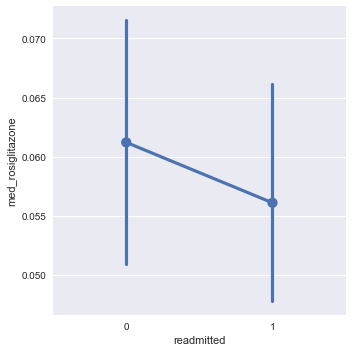

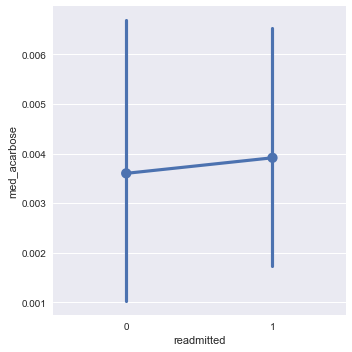

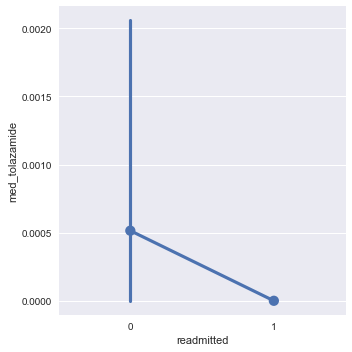

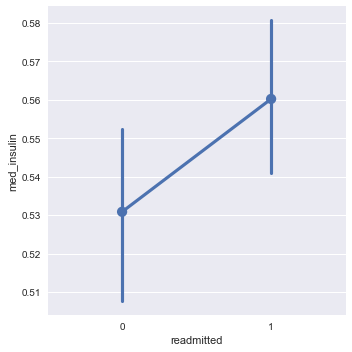

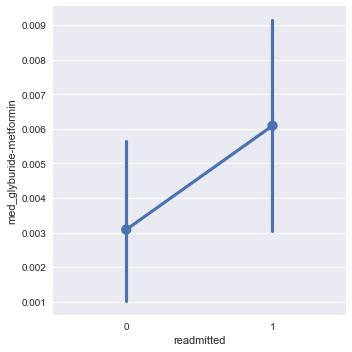

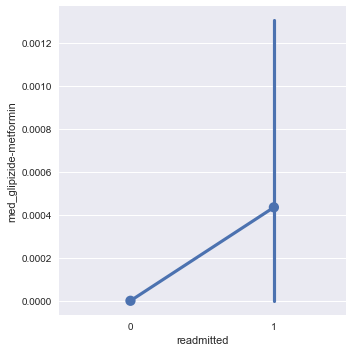

In [74]:
for col in df[medications_list]:
    _ = sns.catplot(x='readmitted', y=str(col), data=df_hf, kind='point', whis=[5, 95])
    plt.savefig('../figures/heartfailure_figs/heartfailure_'+str(col)+'.png',bbox_inches='tight')

In [75]:
out_csv = '../data/eda_clean_train.csv'
df.to_csv(out_csv)